In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

In [2]:
test=pd.read_csv(r"C:\Users\sartyaki\Desktop\ML\BikeData.csv", encoding='latin1')

In [3]:
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['dayofWeek'] = pd.to_datetime(test['Date']).dt.day_name()
test = test.drop("Date",axis = 1)

In [4]:
test['dayofWeek'] = test['dayofWeek'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5, 'Saturday':6,'Sunday':7})

In [5]:
test.dayofWeek.value_counts()

7    1296
3    1272
2    1272
6    1248
4    1248
5    1223
1    1200
Name: dayofWeek, dtype: int64

# EDA

In [6]:
test.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,dayofWeek
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,4


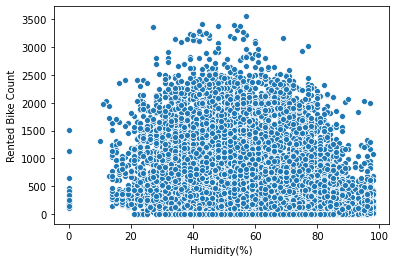

In [7]:
sns.scatterplot(x='Humidity(%)',y='Rented Bike Count',data=test)

In [8]:
test.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'dayofWeek'],
      dtype='object')

# 40-60% humidity bike counts are high

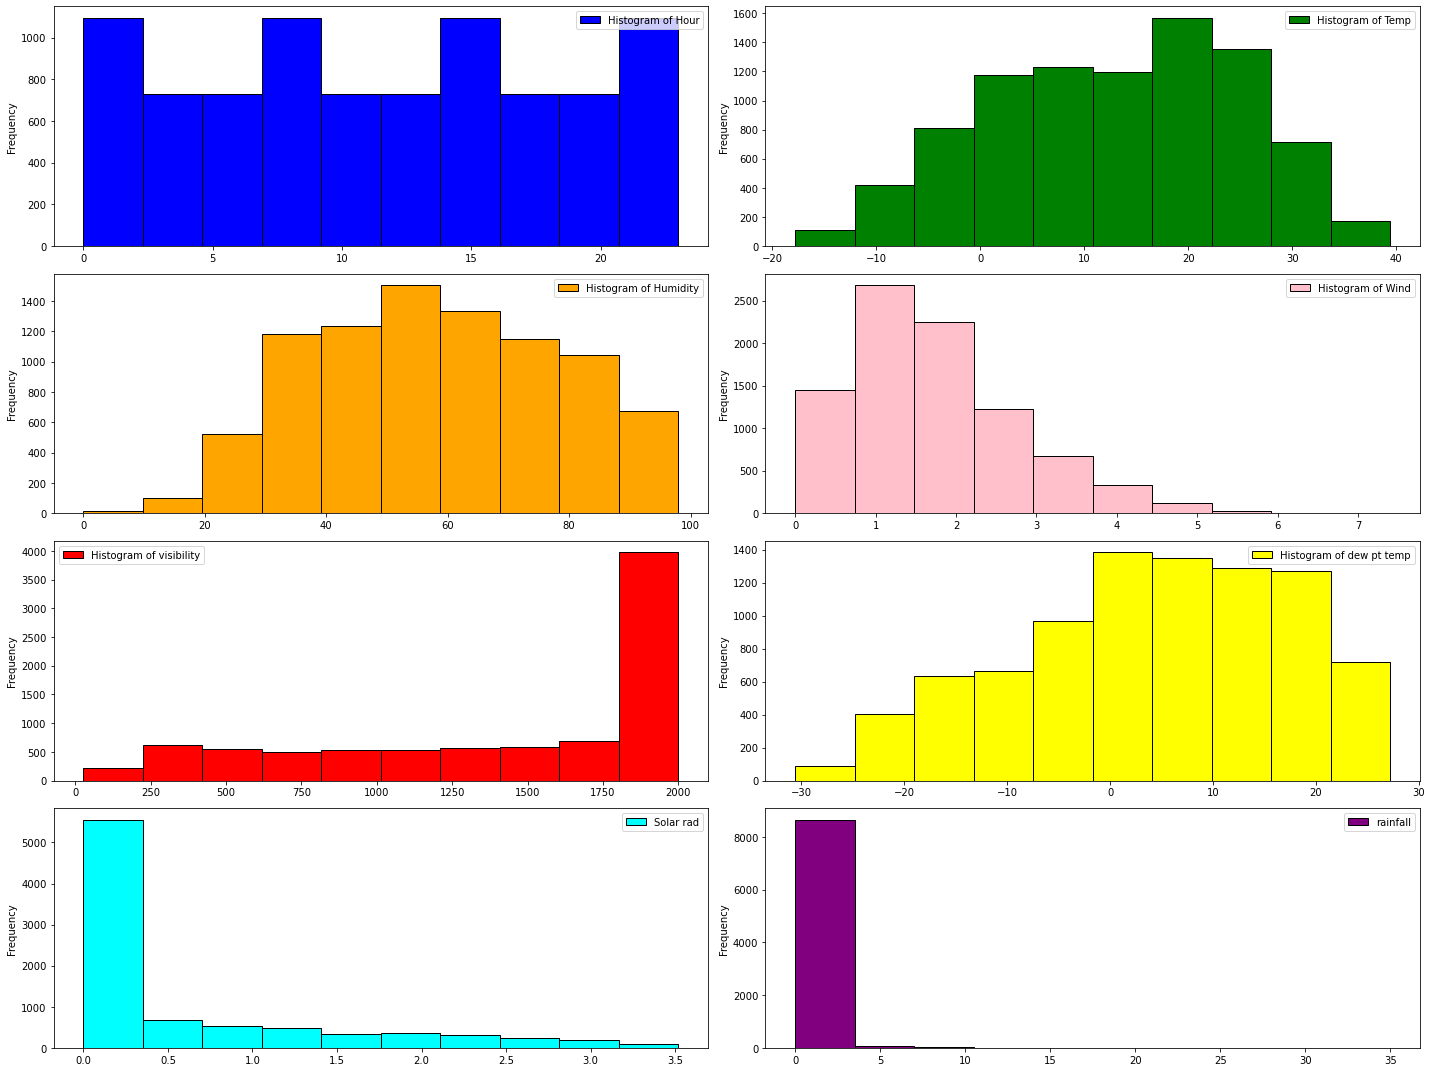

In [9]:
plt.figure(figsize=(20,15))
plt.subplot(421)
test['Hour'].plot.hist(bins=10, color='blue', label='Histogram of Hour', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
test['Temperature(°C)'].plot.hist(bins=10, color='green', label='Histogram of Temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
test['Humidity(%)'].plot.hist(bins=10, color='orange', label='Histogram of Humidity', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
test['Wind speed (m/s)'].plot.hist(bins=10, color='pink', label='Histogram of Wind', edgecolor='black')
plt.legend(loc='best')
plt.subplot(425)
test['Visibility (10m)'].plot.hist(bins=10, color='red', label='Histogram of visibility', edgecolor='black')
plt.legend(loc='best')
plt.subplot(426)
test['Dew point temperature(°C)'].plot.hist(bins=10, color='yellow', label='Histogram of dew pt temp', edgecolor='black')
plt.legend(loc='best')
plt.subplot(427)
test['Solar Radiation (MJ/m2)'].plot.hist(bins=10, color='cyan', label='Solar rad', edgecolor='black')
plt.legend(loc='best')
plt.subplot(428)
test['Rainfall(mm)'].plot.hist(bins=10, color='purple', label='rainfall', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

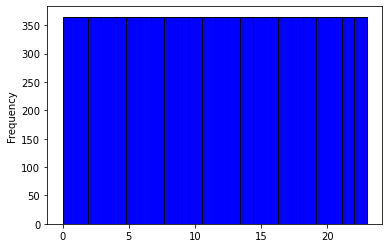

In [10]:
test['Hour'].plot.hist(bins=24, color='blue', label='Histogram of Hour', edgecolor='black')

In [11]:
#temp is normally distributed
#humidity is normally distributed
#Wind speed is naturally distributed-right skewed
#visiboility - left skewed
#dew pt temp - normally distributed
#solar - right skewed
#rainfall- maximum at 0 cm
#snowfall- max at 0
#dayofWeek - Monday has lowest freq- highest at Sunday

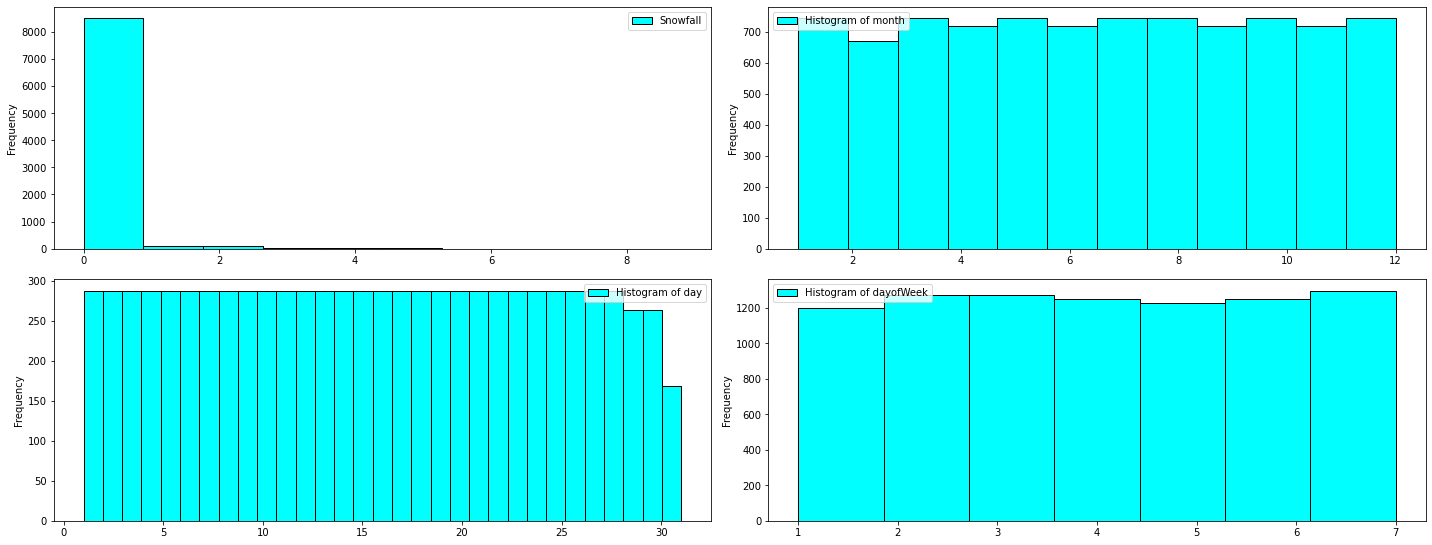

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(421)
test['Snowfall (cm)'].plot.hist(bins=10, color='cyan', label='Snowfall', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
test['Month'].plot.hist(bins=12, color='cyan', label='Histogram of month', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
test['Day'].plot.hist(bins=31, color='cyan', label='Histogram of day', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
test['dayofWeek'].plot.hist(bins=7, color='cyan', label='Histogram of dayofWeek', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

In [13]:
test.drop('Year', axis=1, inplace=True)

In [14]:
test.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,dayofWeek
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,4


In [15]:
geo=pd.get_dummies(test[['Seasons','Holiday','Functioning Day']])

test=pd.concat([test,geo],axis=1)

In [16]:
test1=test.copy()

In [17]:
test1.drop(['Seasons','Holiday','Functioning Day'], axis=1, inplace=True)

# output varioable normalize

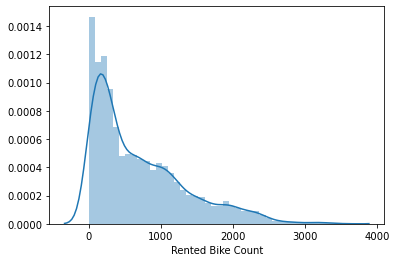

In [18]:
sns.distplot(test1['Rented Bike Count'])

In [19]:
from scipy import stats
print(stats.shapiro(test1['Rented Bike Count']))

ShapiroResult(statistic=0.8822150230407715, pvalue=0.0)


C:\Users\sartyaki\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
test1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,dayofWeek,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1


In [21]:
#test2=test[test['Functioning Day_No']==0]

In [22]:
#test2.drop('Functioning Day_No',axis=1,inplace=True)

# p-value is greater than 0.05 then we accept it is not a normal distribution

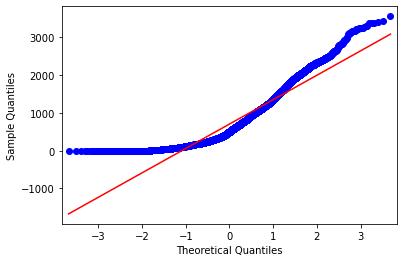

In [23]:
import statsmodels.api as sm
fig = sm.qqplot(test1['Rented Bike Count'],line='s')
plt.show()

# proved

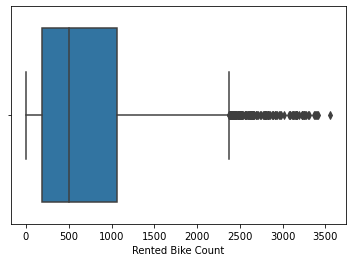

In [24]:
sns.boxplot(test1['Rented Bike Count'])

In [25]:
test1.drop(['Holiday_Holiday','Functioning Day_Yes'],axis=1, inplace=True)

In [26]:
#a=pd.DataFrame(test2['Rented Bike Count'])

In [27]:
#sns.distplot(a['Rented Bike Count'])

In [28]:
#a['Rented Bike Count'] = np.power(a['Rented Bike Count'],1/8)

In [29]:
#transform the data using box-cox
#sample_transformed, lambd = stats.boxcox(test[test['Rented Bike Count']>0]['Rented Bike Count'])
#plot the distribution curve and QQ-plot for transformed data
#sns.distplot(a['Rented Bike Count'])
#plt.show()
#fig = sm.qqplot(a['Rented Bike Count'],line='s')
#plt.show()

In [30]:
test1

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,dayofWeek,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_No
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,11,30,5,1,0,0,0,1,0
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,30,5,1,0,0,0,1,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,30,5,1,0,0,0,1,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,30,5,1,0,0,0,1,0


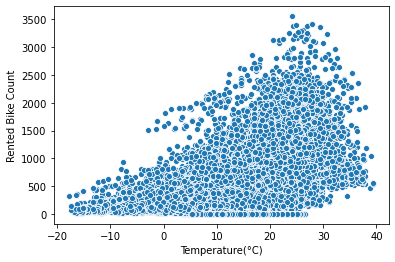

In [31]:
sns.scatterplot(x='Temperature(°C)',y='Rented Bike Count', data=test1)

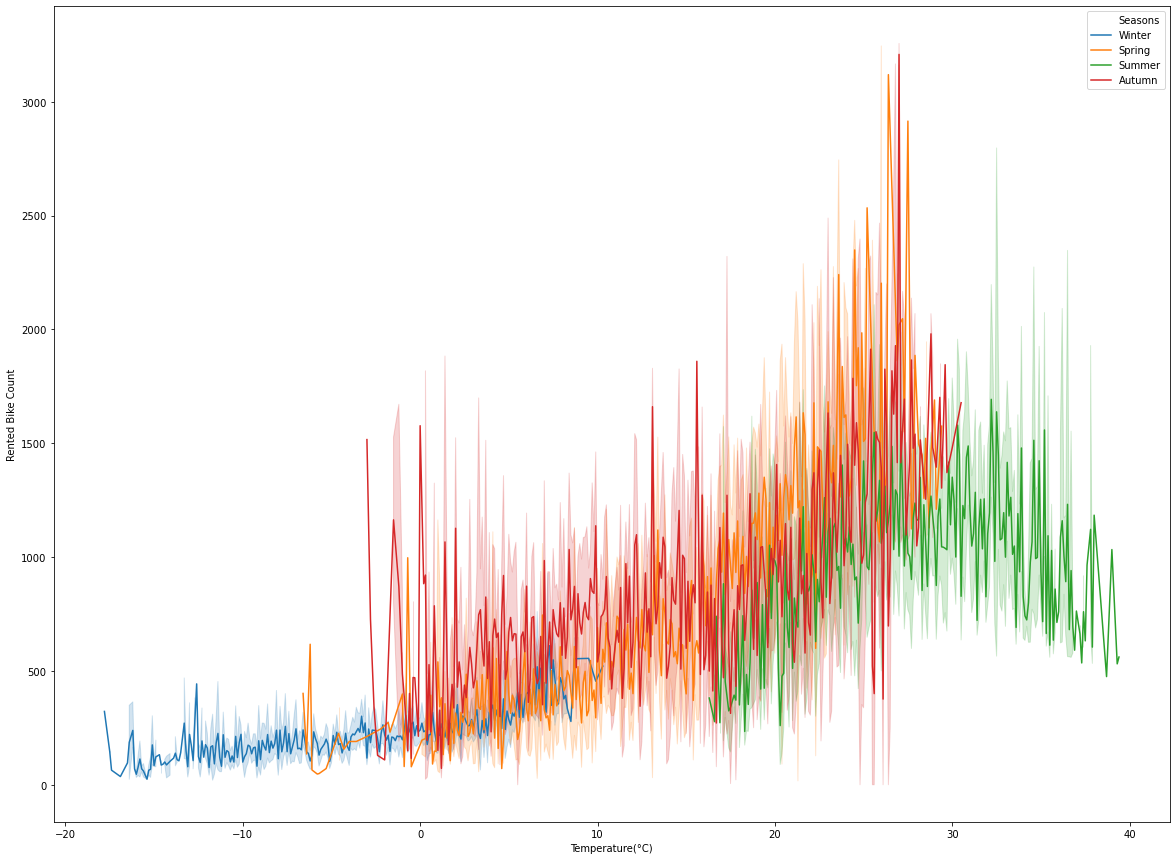

In [32]:
plt.figure(figsize=(20,15))
sns.lineplot(x='Temperature(°C)',y='Rented Bike Count', data=test, hue='Seasons',estimator='mean')

# after 30 degree celsius bike count started to decrease
# post 0 degree it started to increase
# -20 to 0 - constant
# 0-20 - gradual
# 20-30 peak
# >30- steep

In [33]:
test1[['Temperature(°C)','Rented Bike Count']].corr()

,Temperature(°C),Rented Bike Count
Temperature(°C),1.000000,0.538566
Rented Bike Count,0.538566,1.000000


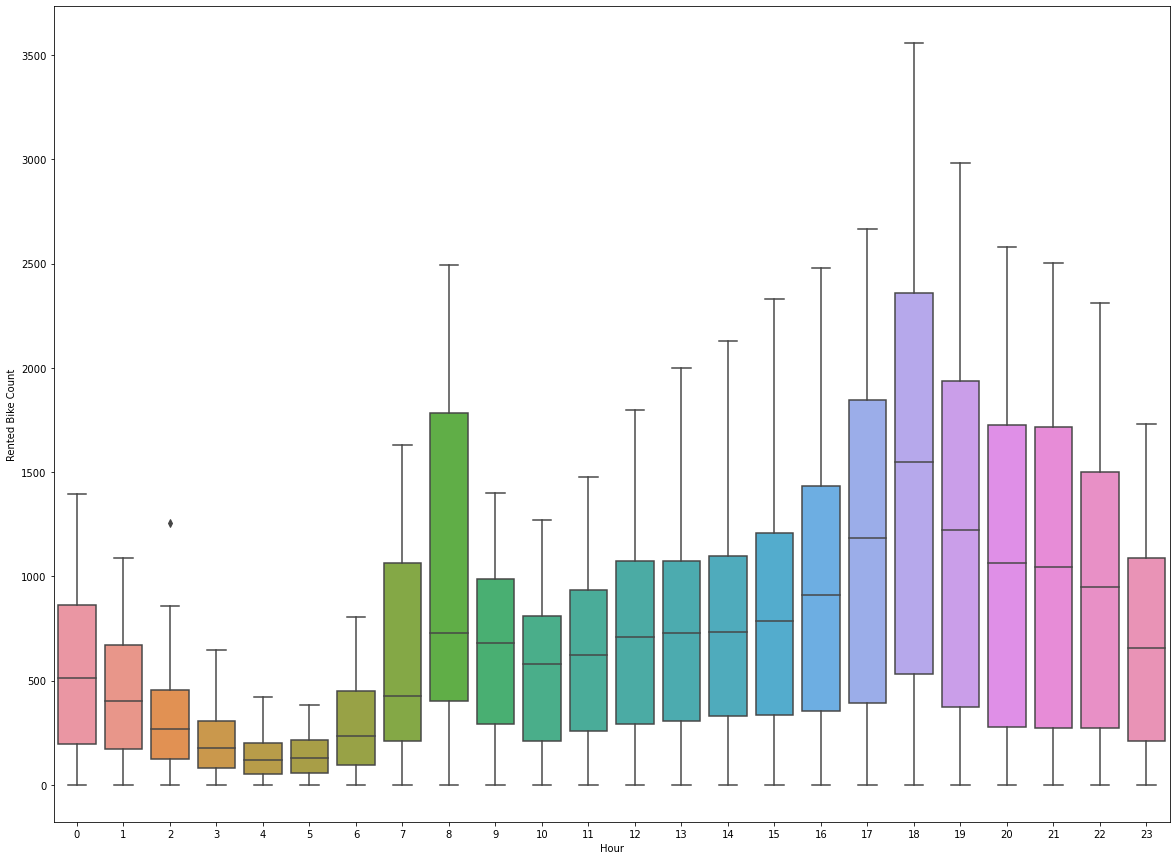

In [34]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Hour',y='Rented Bike Count',data=test1)

# 1-6 - low
# 0 & 9-15- Average
# 7-8 and 16-23 - High

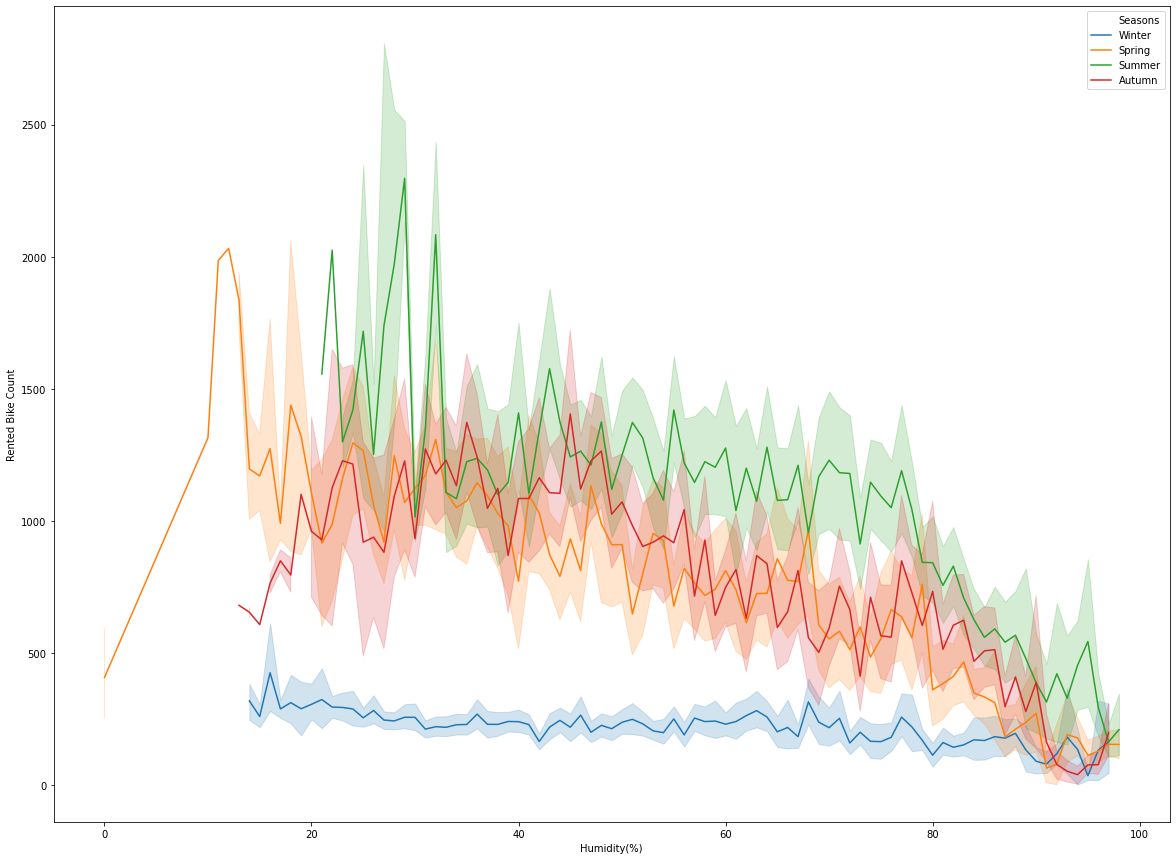

In [35]:
plt.figure(figsize=(20,15))
sns.lineplot(x='Humidity(%)',y='Rented Bike Count', data=test, hue='Seasons',estimator='mean')

# >80 -Humidity High - low band
# 20-30- high demand
# 30-80 - Average
# <20 - suspicious

In [36]:
test1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'Day', 'dayofWeek', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_No'],
      dtype='object')

In [37]:
test1[['Rented Bike Count','Wind speed (m/s)']].corr()

,Rented Bike Count,Wind speed (m/s)
Rented Bike Count,1.000000,0.121101
Wind speed (m/s),0.121101,1.000000


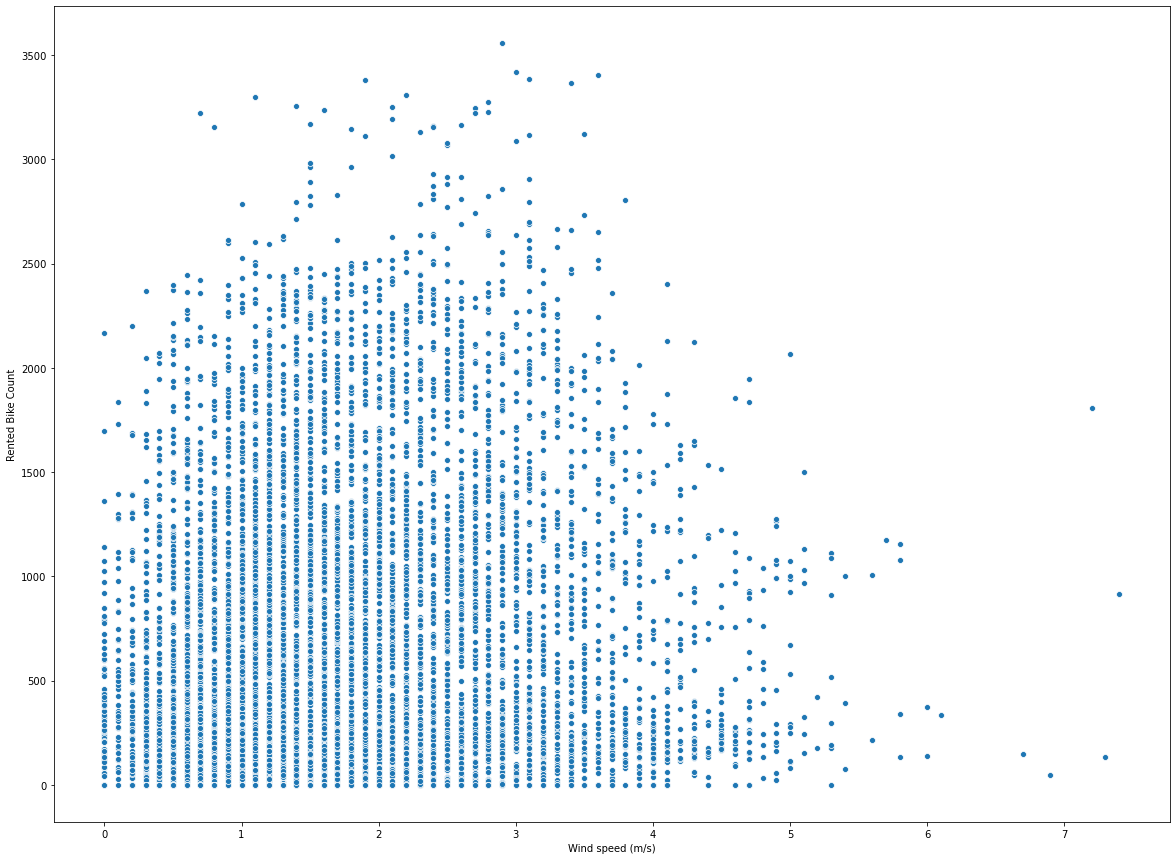

In [38]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='Wind speed (m/s)',y='Rented Bike Count', data=test)

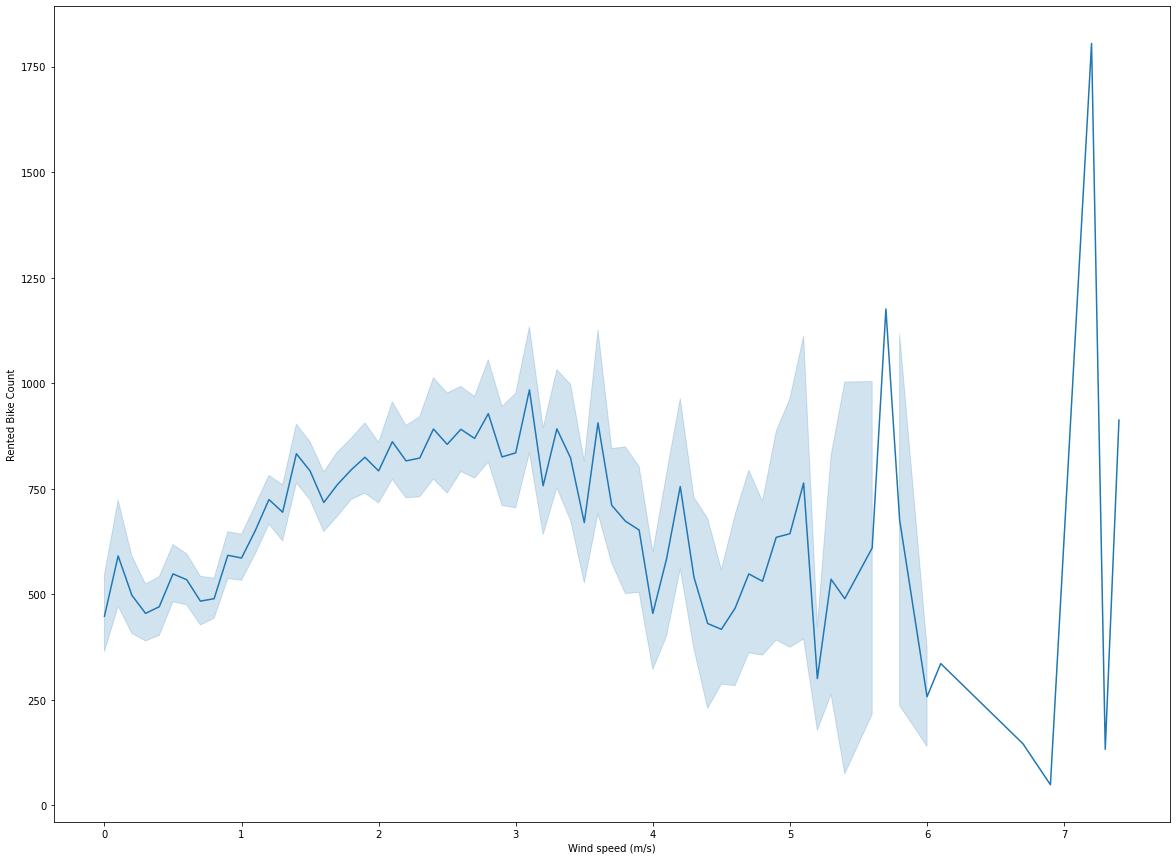

In [39]:
plt.figure(figsize=(20,15))
sns.lineplot(x='Wind speed (m/s)',y='Rented Bike Count', data=test,estimator='mean')

In [40]:
#test[['Rented Bike Count','wind_range_High_avai']].corr()

In [41]:
test

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Day,dayofWeek,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,12,4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,30,5,1,0,0,0,0,1,0,1


In [42]:
test.loc[(test['Wind speed (m/s)']>=1) & (test['Wind speed (m/s)']<3.7), 'wind_range1'] = 'High_avai'
test.loc[test['Wind speed (m/s)']<1, 'wind_range1'] = 'medium_avai'
test.loc[(test['Wind speed (m/s)']>=3.7) & (test['Wind speed (m/s)']<4.4), 'wind_range1'] = 'medium_avai'
test.loc[test['Wind speed (m/s)']>=4.4,'wind_range1'] = 'low_avai'

In [43]:
test['wind_range1'].value_counts()

High_avai      6062
medium_avai    2536
low_avai        161
Name: wind_range1, dtype: int64

In [44]:
test

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,dayofWeek,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes,wind_range1
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,4,0,0,0,1,0,1,0,1,High_avai
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,4,0,0,0,1,0,1,0,1,medium_avai
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,4,0,0,0,1,0,1,0,1,High_avai
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,4,0,0,0,1,0,1,0,1,medium_avai
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,4,0,0,0,1,0,1,0,1,High_avai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,1384,18,4.7,34,1.9,1661,-9.8,0.0,0.0,0.0,...,5,1,0,0,0,0,1,0,1,High_avai
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,5,1,0,0,0,0,1,0,1,High_avai
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,5,1,0,0,0,0,1,0,1,High_avai
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,5,1,0,0,0,0,1,0,1,medium_avai


In [45]:
#df_stat_posthoc.isnull().sum()

In [46]:
#sp.posthoc_dunn(df_stat_posthoc,'Rented Bike Count','wind_range1',p_adjust=None)

# low_avai - not good

In [47]:
test.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day', 'dayofWeek',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_Holiday', 'Holiday_No Holiday', 'Functioning Day_No',
       'Functioning Day_Yes', 'wind_range1'],
      dtype='object')

In [48]:
#test[['Temperature(°C)', 'Humidity(%)','Dew point temperature(°C)','Rented Bike Count','pressure']].corr()

In [49]:
#test['pressure']=test['Humidity(%)']*test['Dew point temperature(°C)']

In [50]:
#test1

plt.figure(figsize=(30, 25))
sns.heatmap(test1.corr(method='spearman'), annot=True)

In [51]:
#plt.figure(figsize=(30, 25)) 
#sns.heatmap(test1.corr(method='spearman'), annot=True)

In [52]:
#plt.figure(figsize=(30, 25)) 
#sns.heatmap(test1.corr(method='pearson'), annot=True)

In [107]:
test1.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Month                          int64
Day                            int64
dayofWeek                      int64
Seasons_Autumn                 uint8
Seasons_Spring                 uint8
Seasons_Summer                 uint8
Seasons_Winter                 uint8
Holiday_No Holiday             uint8
Functioning Day_No             uint8
dtype: object

In [54]:
X = test1.drop('Rented Bike Count', axis=1)
y = test1['Rented Bike Count']

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [56]:
#x= sm.add_constant(x_train)  
# performing the regression# and fitting the model
#result= sm.OLS(y_train, x).fit()  
# printing the summary 
#print(result.summary())

In [57]:
from sklearn.feature_selection import mutual_info_regression
importance=mutual_info_regression(x_train,y_train)
fea_imp=pd.Series(importance,x_train.columns[0:len(x_train.columns)])

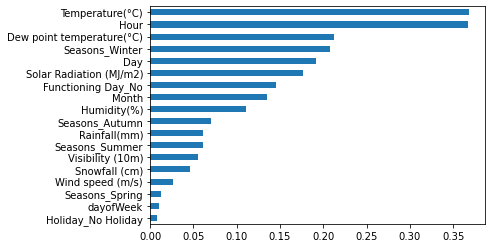

In [58]:
fea_imp.sort_values(ascending=True).plot(kind='barh')

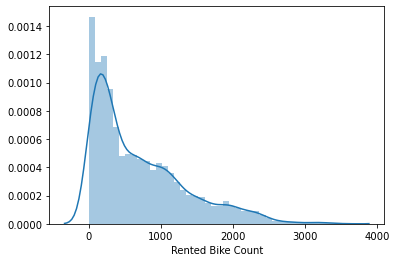

In [59]:
sns.distplot(test1['Rented Bike Count'])

In [60]:
test_trial=test1.copy()

In [61]:
#test_trial['Rented Bike Count'] = np.log(1+test_trial['Rented Bike Count'])

In [62]:
test1.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,dayofWeek,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_No
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,4,0,0,0,1,1,0


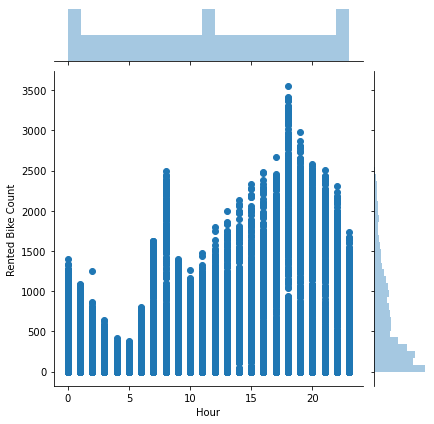

In [63]:
sns.jointplot(x='Hour', y='Rented Bike Count', data=test_trial)

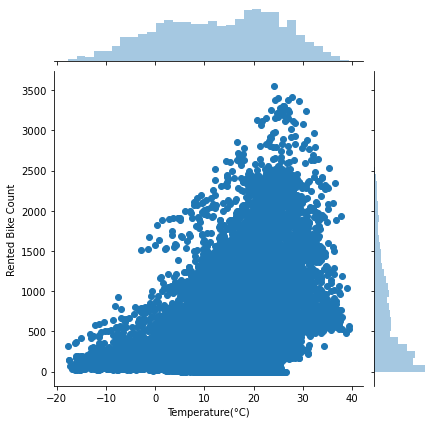

In [64]:
sns.jointplot(x='Temperature(°C)', y='Rented Bike Count', data=test_trial)

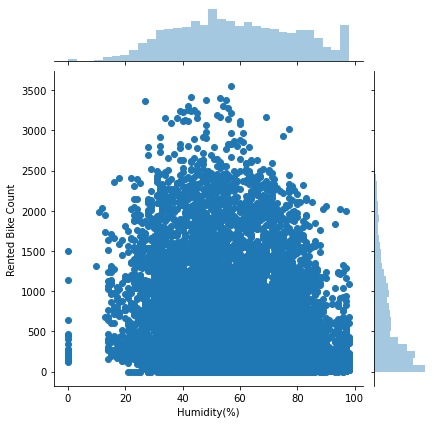

In [65]:
sns.jointplot(x='Humidity(%)', y='Rented Bike Count', data=test_trial)

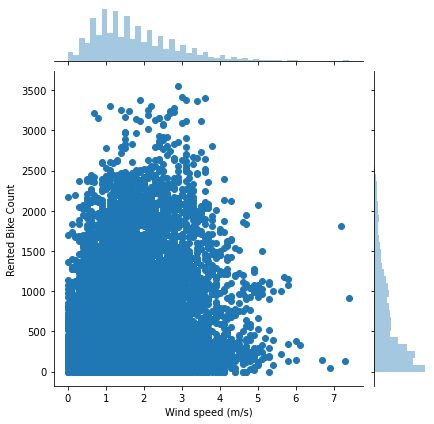

In [66]:
sns.jointplot(x='Wind speed (m/s)', y='Rented Bike Count', data=test_trial)

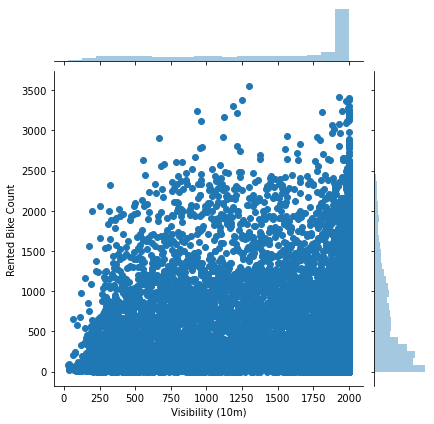

In [67]:
sns.jointplot(x='Visibility (10m)', y='Rented Bike Count', data=test_trial)

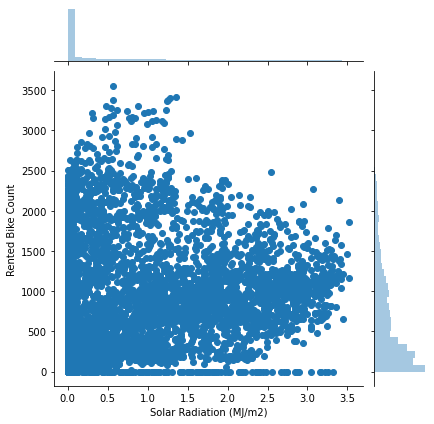

In [68]:
sns.jointplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', data=test_trial)

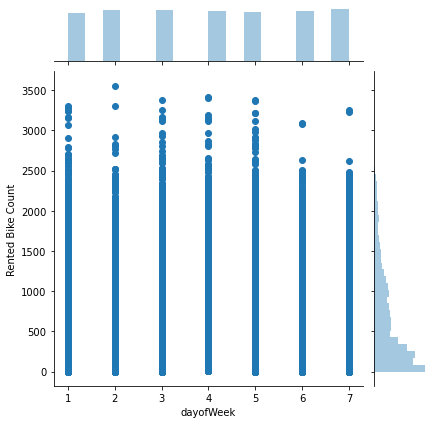

In [69]:
sns.jointplot(x='dayofWeek', y='Rented Bike Count', data=test_trial)

In [70]:
test_trial.drop(['Month','Day'], axis=1, inplace=True)

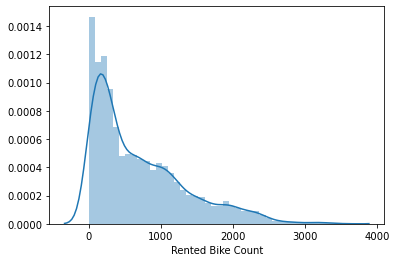

In [71]:
sns.distplot(test_trial['Rented Bike Count'])

In [72]:
def f(df2):



    if df2['Snowfall (cm)'] ==0:

       return 'no snowfall'  

    elif (df2['Snowfall (cm)']>0) and (df2['Snowfall (cm)']<2):

       return 'light snowfall'

    

    else:

       return 'high snowfall'

In [73]:
test_trial['Snowfall (cm)'] = test_trial.apply(f,axis=1)

In [74]:
def f(df2):



    if df2['Rainfall(mm)'] ==0:

       return 'no rainfall'  

    elif (df2['Rainfall(mm)']>0) and (df2['Rainfall(mm)']<2.5):

       return 'light rainfall'

    elif (df2['Rainfall(mm)']>2.5) and (df2['Rainfall(mm)']<7.5):

       return 'medium rainfall'

    else:

       return 'high rainfall'

In [75]:
test_trial['Rainfall(mm)'] = test_trial.apply(f,axis=1)

In [76]:
def f(df2):



    if df2['Rainfall(mm)'] =='no rainfall' and df2['Snowfall (cm)']=='no snowfall':

       return 'clear weather'

    elif df2['Rainfall(mm)'] =='light rainfall' and df2['Snowfall (cm)']=='light snowfall':

       return 'good weather'

    elif df2['Rainfall(mm)'] =='medium rainfall' and df2['Snowfall (cm)']=='light snowfall':

       return 'bad weather'   

    else:

       return 'worst weather'

In [77]:
test_trial['Weather'] = test_trial.apply(f,axis=1)

In [78]:
test_trial.drop(['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

In [79]:
geo=pd.get_dummies(test_trial[['Weather']])

test_trial=pd.concat([test_trial,geo],axis=1)

In [80]:
test_trial.drop('Weather',axis=1,inplace=True)

In [81]:
test_trial.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),dayofWeek,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_No,Weather_bad weather,Weather_clear weather,Weather_good weather,Weather_worst weather
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,4,0,0,0,1,1,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,4,0,0,0,1,1,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,4,0,0,0,1,1,0,0,1,0,0


In [82]:
test_trial.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'dayofWeek', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_No', 'Weather_bad weather',
       'Weather_clear weather', 'Weather_good weather',
       'Weather_worst weather'],
      dtype='object')

In [83]:
X = test_trial.drop('Rented Bike Count', axis=1)
y = test_trial['Rented Bike Count']

In [84]:
y = np.log(1+y)

In [85]:
def min_max_scaling(df2):

    # copy the dataframe

    df_norm = X.copy()

    # apply min-max scaling

    for column in df_norm.columns:

        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

        

    return df_norm

    

# call the min_max_scaling function

X = min_max_scaling(X)

In [86]:
y

0       5.541264
1       5.323010
2       5.159055
3       4.682131
4       4.369448
          ...   
8754    7.233455
8755    6.911747
8756    6.639876
8757    6.543912
8758    6.569481
Name: Rented Bike Count, Length: 8759, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
#import lightgbm as lgb
#import xgboost as xg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [89]:
def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    #LogRMSE = mean_squared_error(np.log(true),np.log(predicted),squared = False)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    #print("LogRMSE:", LogRMSE)

In [90]:
def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()

In [91]:
model_l = LinearRegression().fit(x_train,y_train)
RFReg = RandomForestRegressor(random_state = 0).fit(x_train,y_train)
DTReg = DecisionTreeRegressor(random_state = 0).fit(x_train,y_train)
knn = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)
SVM = svm.SVR().fit(x_train,y_train) 
#XGReg = xg.XGBRegressor(objective ='reg:squarederror', seed = 0,verbosity=0).fit(train_x,train_y) 
#LGBMReg = lgb.LGBMRegressor(random_state=0).fit(train_x,train_y)

In [92]:
print("LinearRegression") 
predicted_train_y_l = model_l.predict(x_train)
evaluateRegressor(y_train,predicted_train_y_l,"    Training Set")
predicted_valid_y_l = model_l.predict(x_test)
evaluateRegressor(y_test,predicted_valid_y_l,"    Test Set")
print("\n")

print("DecisionTreeRegressor") 
predicted_train_y_d = DTReg.predict(x_train)
evaluateRegressor(y_train,predicted_train_y_d,"    Training Set")
predicted_valid_y_d = DTReg.predict(x_test)
evaluateRegressor(y_test,predicted_valid_y_d,"    Test Set")
print("\n")

print("KNeighborsRegressor") 
predicted_train_y_k = knn.predict(x_train)
evaluateRegressor(y_train,predicted_train_y_k,"    Training Set")
predicted_valid_y_k = knn.predict(x_test)
evaluateRegressor(y_test,predicted_valid_y_k,"    Test Set")
print("\n")

print("Random Forest Regressor") 
predicted_train_y_r = RFReg.predict(x_train)
evaluateRegressor(y_train,predicted_train_y_r,"    Training Set")
predicted_valid_y_r = RFReg.predict(x_test)
evaluateRegressor(y_test,predicted_valid_y_r,"    Test Set")
print("\n")
    
print("Support Vector Machine") 
predicted_train_y_s = SVM.predict(x_train)
evaluateRegressor(y_train,predicted_train_y_s,"    Training Set")
predicted_valid_y_s = SVM.predict(x_test)
evaluateRegressor(y_test,predicted_valid_y_s,"    Test Set")
print("\n")


#print("XGBoost Regressor") 
#predicted_train_y = XGReg.predict(train_x)
#evaluateRegressor(train_y,predicted_train_y,"    Training Set")
#predicted_valid_y = XGReg.predict(val_x)
#evaluateRegressor(val_y,predicted_valid_y,"    Test Set")
#print("\n")

#print("LightGBM Regressor") 
#predicted_train_y = LGBMReg.predict(train_x)
#evaluateRegressor(train_y,predicted_train_y,"    Training Set")
#predicted_valid_y = LGBMReg.predict(val_x)
#evaluateRegressor(val_y,predicted_valid_y,"    Test Set")

LinearRegression
    Training Set
MSE: 0.518049807075156
MAE: 0.5314746358935742
RMSE: 0.7197567693847388
    Test Set
MSE: 0.4766626264632995
MAE: 0.5122576580530942
RMSE: 0.6904075799578822


DecisionTreeRegressor
    Training Set
MSE: 0.0
MAE: 0.0
RMSE: 0.0
    Test Set
MSE: 0.30112676046302794
MAE: 0.3309149021068889
RMSE: 0.5487501803763056


KNeighborsRegressor
    Training Set
MSE: 0.18709415366443616
MAE: 0.2819837056569105
RMSE: 0.4325438170456678
    Test Set
MSE: 0.27665468996827564
MAE: 0.346215995298295
RMSE: 0.5259797429257858


Random Forest Regressor
    Training Set
MSE: 0.023037528133819433
MAE: 0.09283560567665859
RMSE: 0.15178118504551028
    Test Set
MSE: 0.15307556547239173
MAE: 0.24408553593670118
RMSE: 0.3912487258412374


Support Vector Machine
    Training Set
MSE: 0.356214609661876
MAE: 0.4050011495284105
RMSE: 0.5968371718164646
    Test Set
MSE: 0.33706921293836595
MAE: 0.3966639919959865
RMSE: 0.580576621074571




In [93]:
y_test

6055    6.935370
5556    6.712956
8148    6.879356
7945    6.276643
3319    6.988413
          ...   
1129    5.214936
4315    6.169611
6061    6.546785
3438    1.791759
208     6.304449
Name: Rented Bike Count, Length: 2190, dtype: float64

In [94]:
predicted_valid_y_r

array([6.95337298, 6.58244901, 6.87145567, ..., 6.53448852, 2.72264807,
       6.0388286 ])

In [95]:
Predicted_value = np.exp(predicted_valid_y_r)-1

In [96]:
Predicted_value

array([1045.67419226,  721.30609645,  963.35132469, ...,  687.4815499 ,
         14.22057407,  418.40146042])

In [97]:
#y_test_nor = np.exp(y_test)-1

In [98]:
#y_test_nor

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y_test,predicted_valid_y_r)

0.9354977526489923

In [101]:
#r2_score(Predicted_value,y_test_nor)

In [102]:
r2_score(y_train,predicted_train_y_r)

0.9909108325492919

In [103]:
import pickle
pickle_out = open("Random_regression.pkl","wb")
pickle.dump(RFReg,pickle_out)
pickle_out.close()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),dayofWeek,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_No,Weather_bad weather,Weather_clear weather,Weather_good weather,Weather_worst weather
6055,0.304348,0.765734,0.795918,0.094595,0.993918,0.906574,0.045455,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5556,0.521739,0.881119,0.520408,0.283784,0.391789,0.894464,0.911932,0.666667,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8148,0.521739,0.597902,0.489796,0.283784,0.317283,0.621107,0.477273,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7945,0.043478,0.431818,0.561224,0.243243,1.000000,0.503460,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3319,0.304348,0.423077,0.520408,0.135135,0.694881,0.477509,0.053977,0.333333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.043478,0.368881,0.653061,0.054054,0.158135,0.480969,0.000000,0.333333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4315,0.826087,0.701049,0.724490,0.337838,0.628991,0.818339,0.039773,0.166667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6061,0.565217,0.909091,0.418367,0.229730,1.000000,0.858131,0.656250,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3438,0.260870,0.470280,0.969388,0.364865,0.175367,0.673010,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [105]:
x_train.dtypes

Hour                         float64
Temperature(°C)              float64
Humidity(%)                  float64
Wind speed (m/s)             float64
Visibility (10m)             float64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
dayofWeek                    float64
Seasons_Autumn               float64
Seasons_Spring               float64
Seasons_Summer               float64
Seasons_Winter               float64
Holiday_No Holiday           float64
Functioning Day_No           float64
Weather_bad weather          float64
Weather_clear weather        float64
Weather_good weather         float64
Weather_worst weather        float64
dtype: object